## Step 0: Import libraries and dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Step 1: Descriptive analysis

In [5]:
# Preview training dataset
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Preview testing dataset
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
# Training dataset dimensions - (rows, columns)
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [8]:
# Testing dataset dimensions - (rows, columns)
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [9]:
# Features data-type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
# Statistical summary
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
# Checking for Null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [12]:
# Checking the counts of unique values
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

Age
26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: proportion, dtype: object

In [13]:
# Checking the counts of unique values
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

Stay_In_Current_City_Years
1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: proportion, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The feature 'Product_Category_2' contains 31.57% null values which can be imputed whereas 'Product_Category_3' contains 69.67% null values so we can drop this feature.
</p></li>    

<li><p style="font-family:verdana;">
The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.
</p></li>    

</ul>

</div>

## Step 2: Exploratory Data Analysis

### 2.1 Univariate Analysis

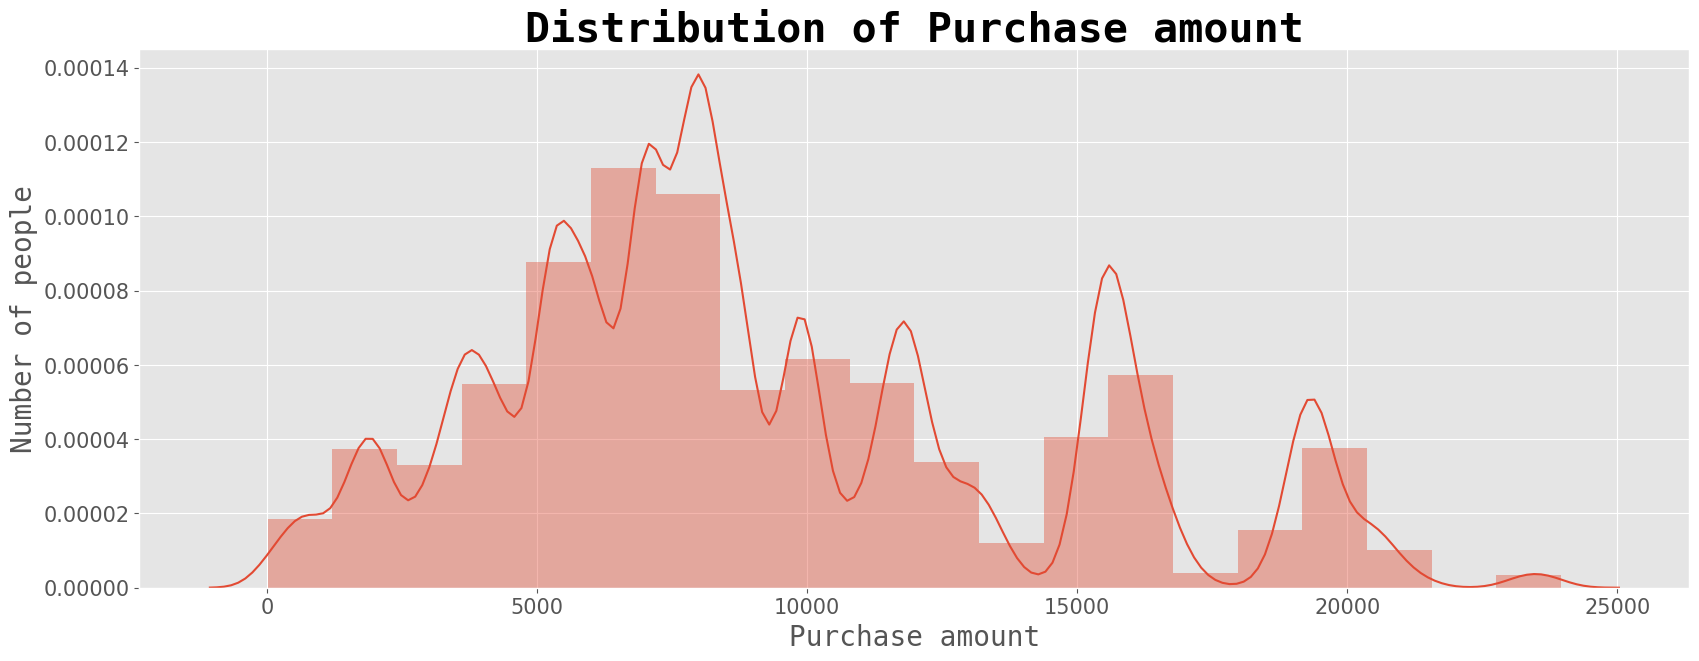

In [17]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.savefig('Distribution_of_purchase_amount.png')
plt.show()

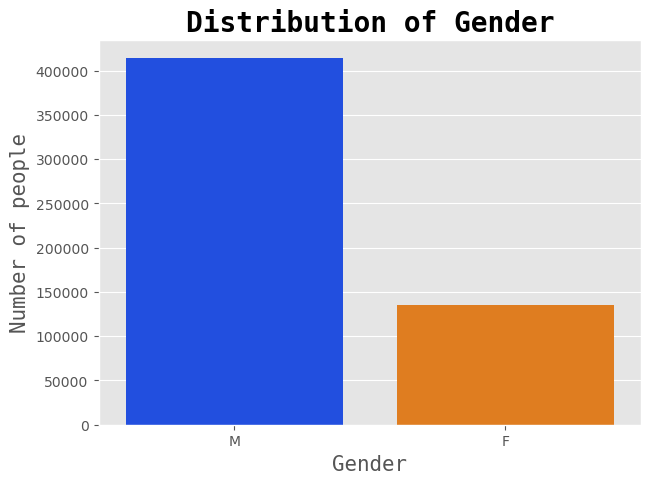

In [18]:
# Creating a barplot for 'Gender'
gen = train['Gender'].value_counts()

plt.figure(figsize=(7, 5))

# Use x and y explicitly for sns.barplot
sns.barplot(x=gen.index, y=gen.values, palette='bright')

# Plot title and labels with specified font details
plt.title('Distribution of Gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Adjust tick label size
plt.tick_params(labelsize=10)
plt.savefig('Distribution_of_gender.png')
plt.show()


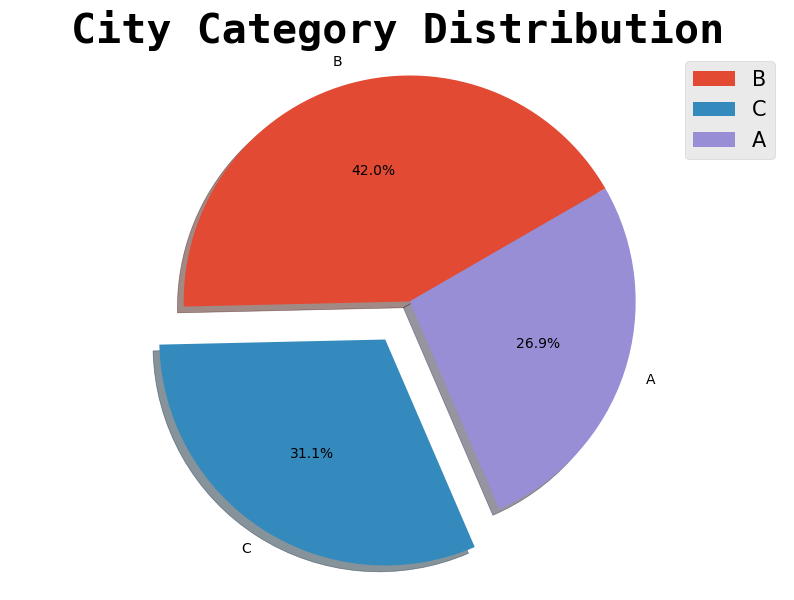

In [19]:
# Creating a pie chart for 'City Category'
city = train['City_Category'].value_counts()

plt.figure(figsize=(10, 7))

# Create the pie chart with explode adjusted for the categories
plt.pie(city.values, labels=city.index, startangle=30, explode=(0, 0.2, 0), 
        shadow=True, autopct='%1.1f%%')

# Set title with font adjustments
plt.title('City Category Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})

# Add legend with specific font size
plt.legend(prop={'size': 15})

# Ensure pie chart is a circle
plt.axis('equal')
plt.savefig('City_category_distribution.png')
plt.show()


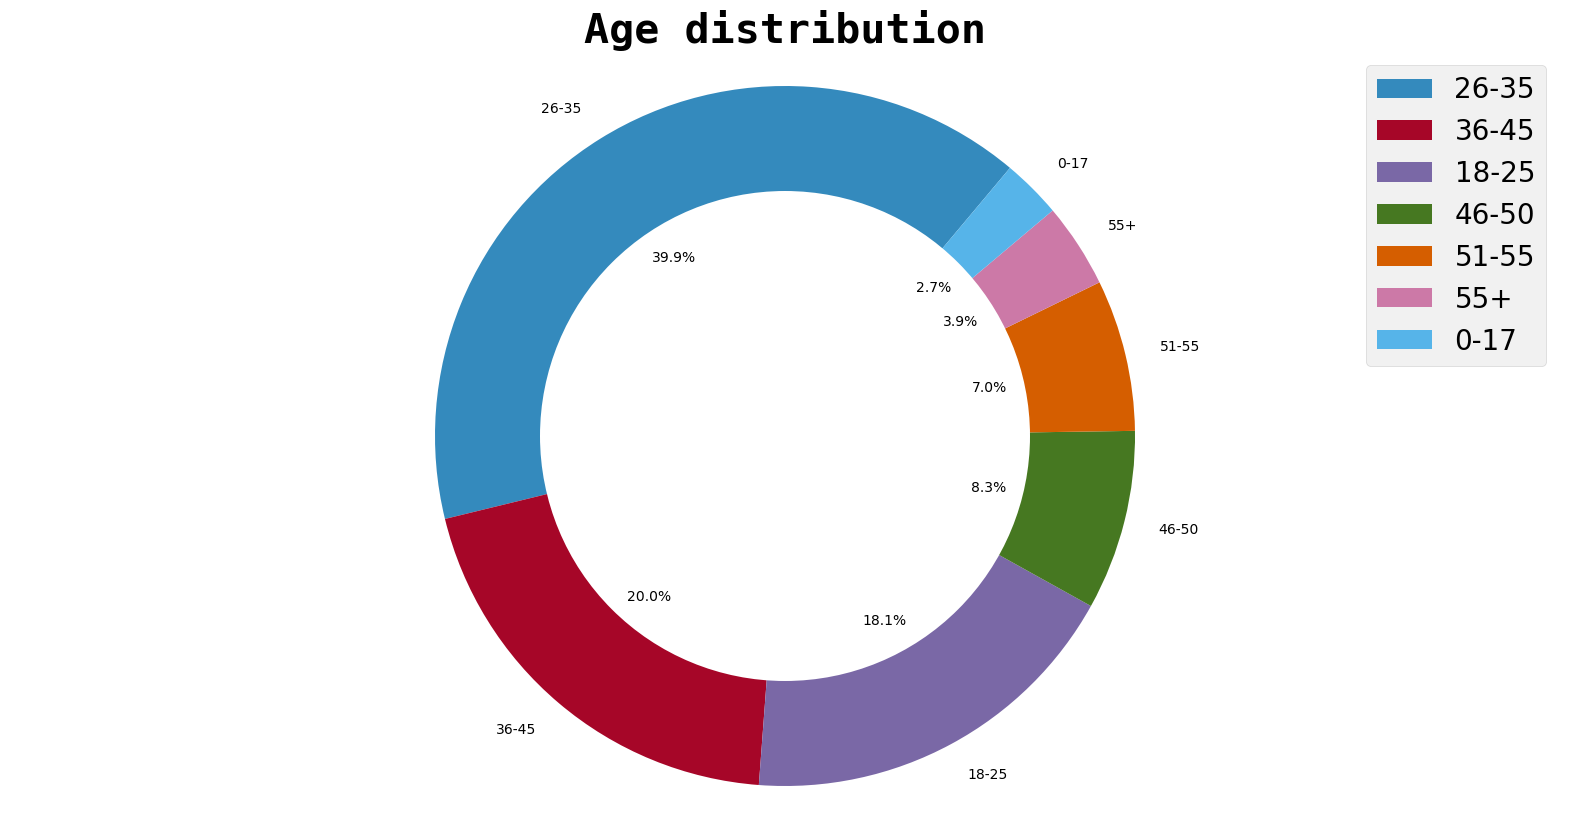

In [20]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.savefig('Age_distribution.png')
plt.show()

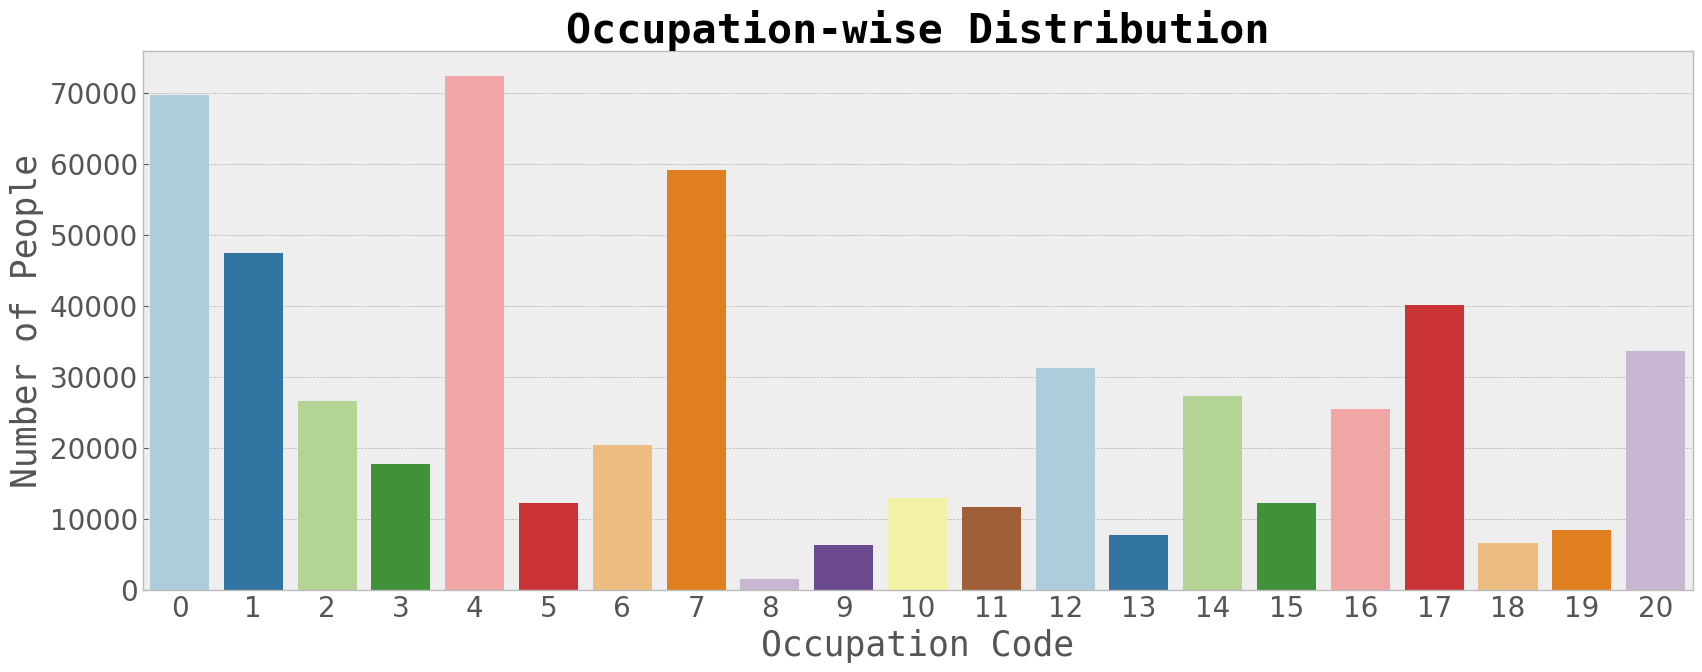

In [21]:
# Creating a barplot for 'Occupation'
occupation = train['Occupation'].value_counts()

plt.figure(figsize=(20, 7))

# Use keyword arguments for x and y in sns.barplot
sns.barplot(x=occupation.index, y=occupation.values, palette='Paired')

# Title and labels with adjusted font
plt.title('Occupation-wise Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.xlabel('Occupation Code', fontdict={'fontname': 'Monospace', 'fontsize': 25})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 25})

# Set tick parameters
plt.tick_params(labelsize=20)
plt.savefig('Occupation_wise_distribution.png')
plt.show()


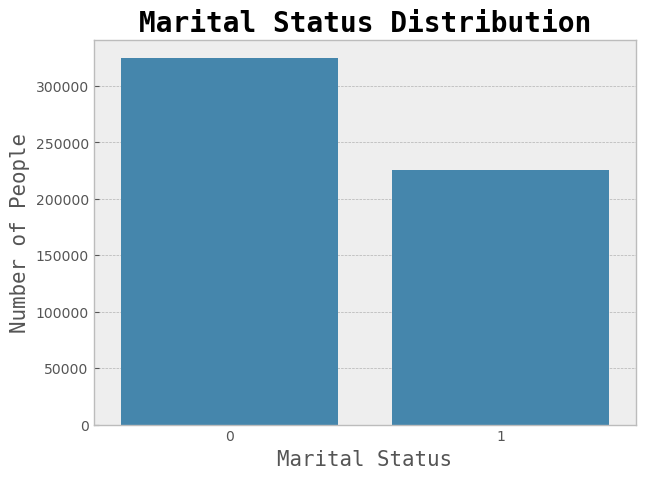

In [22]:
# Creating a countplot for 'Marital Status'
plt.figure(figsize=(7, 5))

# Specify `x` and `data` parameters in sns.countplot
sns.countplot(x='Marital_Status', data=train)

# Title and labels with font specifications
plt.title('Marital Status Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Adjust tick parameters
plt.tick_params(labelsize=10)
plt.savefig('Marital_status_distribution.png')
plt.show()


### 2.2 Bivariate Analysis

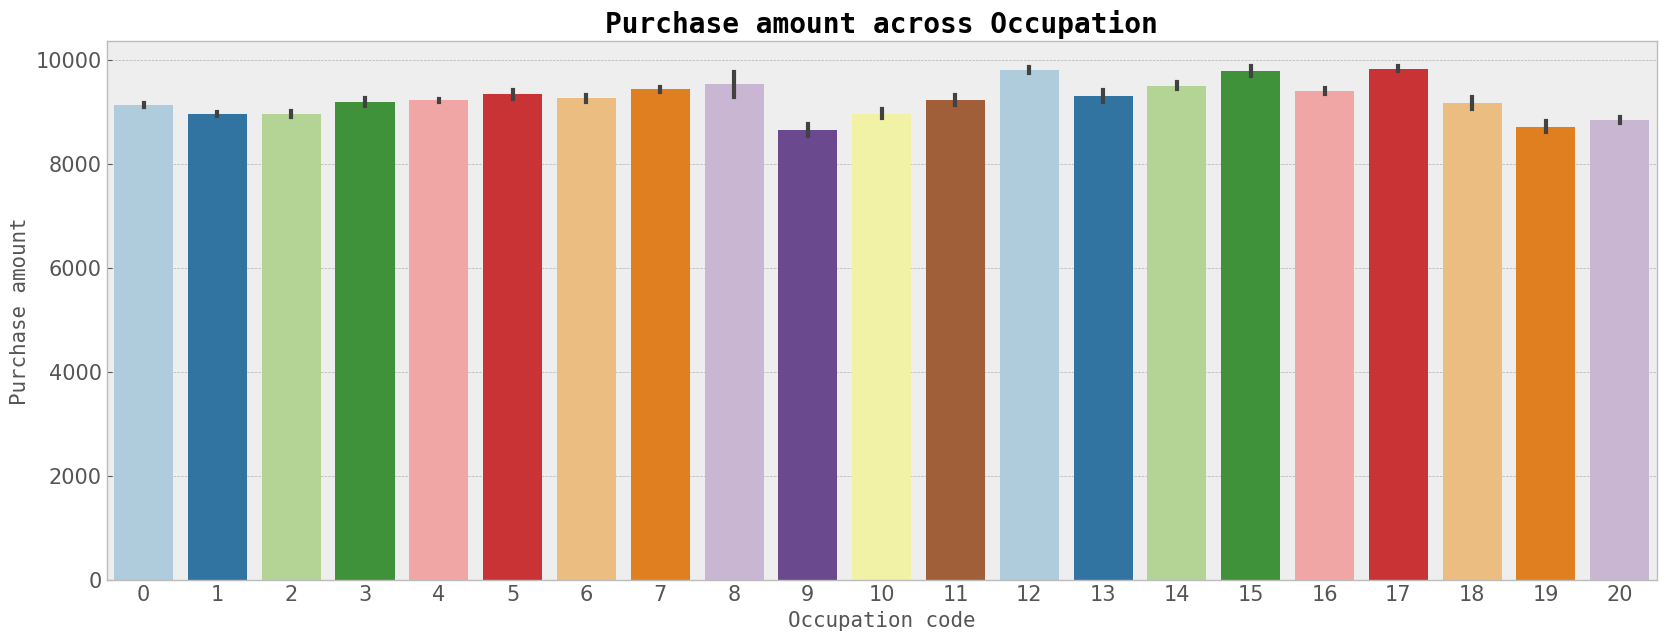

In [24]:
plt.figure(figsize=(20, 7))
# Convert Occupation to string if it is categorical
sns.barplot(x=train['Occupation'].astype(int), y=train['Purchase'], palette='Paired')

plt.title('Purchase amount across Occupation', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Occupation code', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=15)
plt.savefig('Purchase_amount_across_occupation.png')
plt.show()

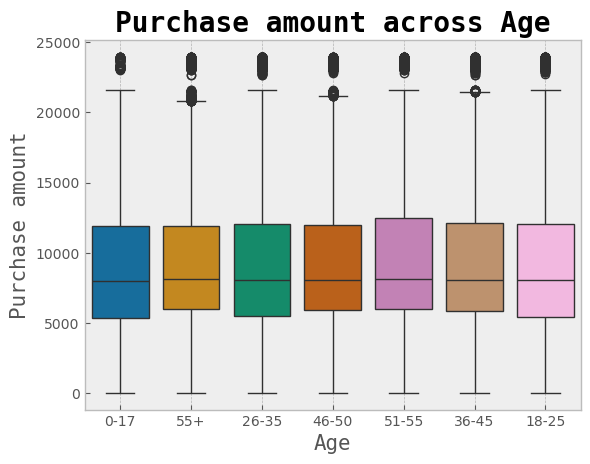

In [25]:
plt.style.use('bmh')
# Creating the boxplot
sns.boxplot(x=train['Age'], y=train['Purchase'], palette='colorblind')

plt.title('Purchase amount across Age', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.savefig('Purchase_amount_across_age.png')
plt.show()

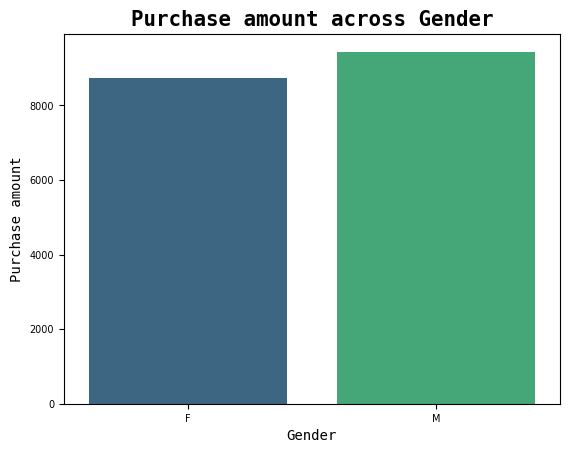

In [26]:
plt.style.use('default')
# Creating the bar plot
sns.barplot(x=train['Gender'], y=train['Purchase'], ci=None, palette='viridis')

plt.title('Purchase amount across Gender', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=7)
plt.savefig('Purchase_amount_across_gender.png')
plt.show()

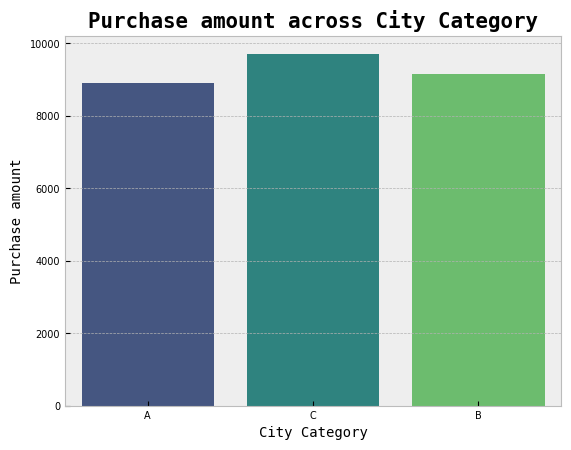

In [27]:
 plt.style.use('bmh')
# Creating the bar plot
sns.barplot(x=train['City_Category'], y=train['Purchase'], ci=None, palette='viridis')

plt.title('Purchase amount across City Category', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('City Category', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=7)
plt.savefig('Purchase_amount_across_city_category.png')
plt.show()

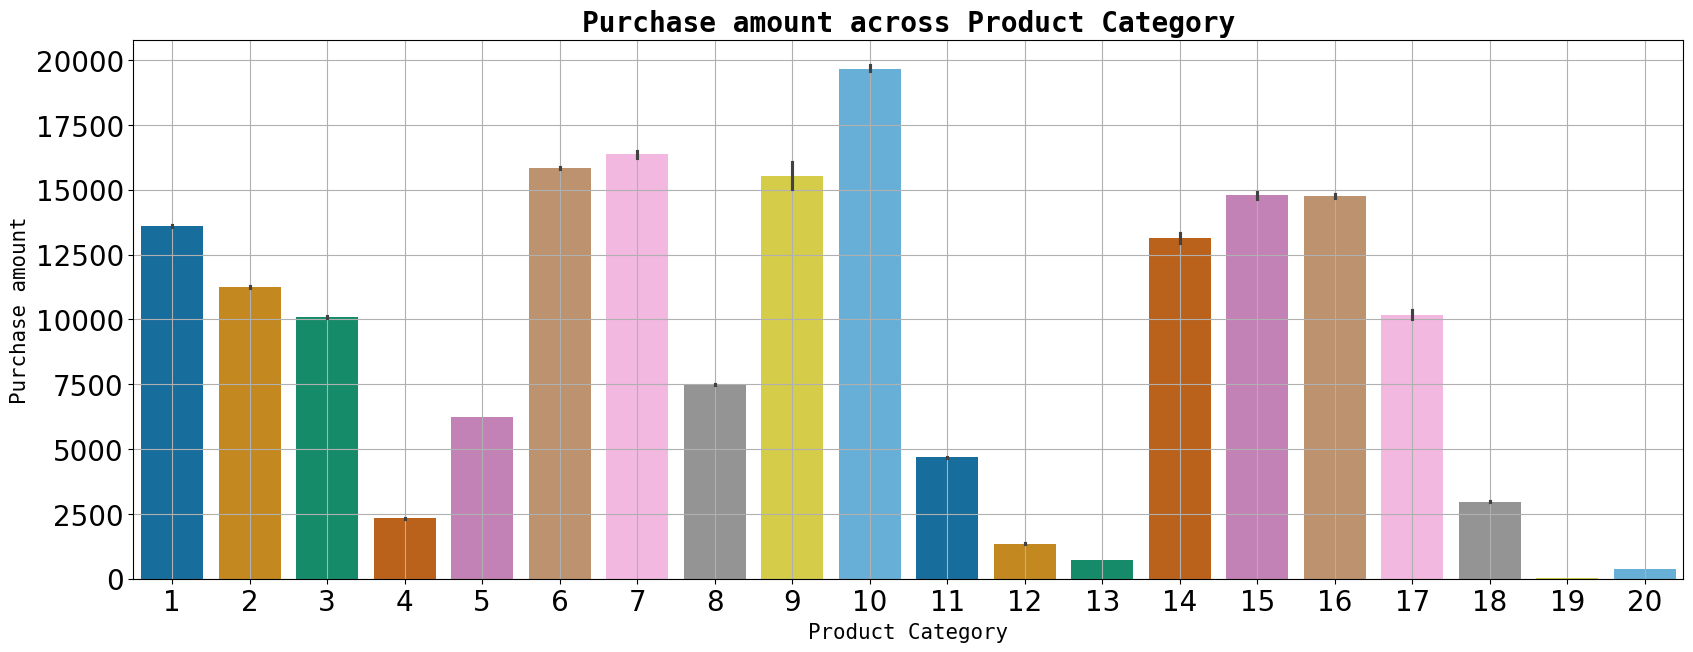

In [28]:
plt.style.use('default')
plt.figure(figsize=(20, 7))
# Creating the bar plot
sns.barplot(x=train['Product_Category_1'], y=train['Purchase'], palette='colorblind')

plt.title('Purchase amount across Product Category', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Product Category', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=20)
plt.grid()
plt.savefig('Purchase_amount_across_product_category.png')
plt.show()

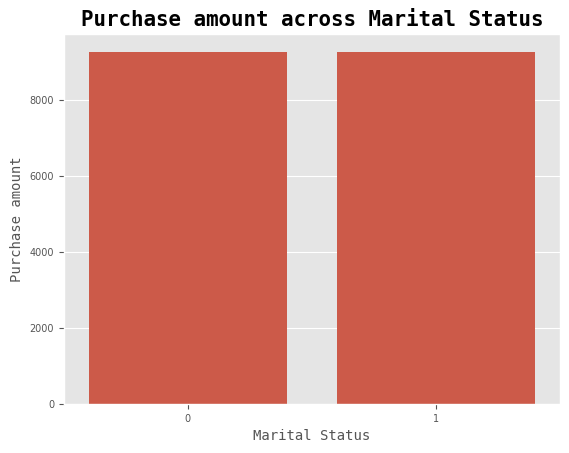

In [29]:
plt.style.use('ggplot')
# Creating a barplot of 'Marital Status vs Purchase'
sns.barplot(x=train['Marital_Status'], y=train['Purchase'], ci=None)

plt.title('Purchase amount across Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Purchase amount', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=7)
plt.savefig('Purchase_amount_across_marital_status.png')
plt.show()

### 2.3 Multivariate Analysis

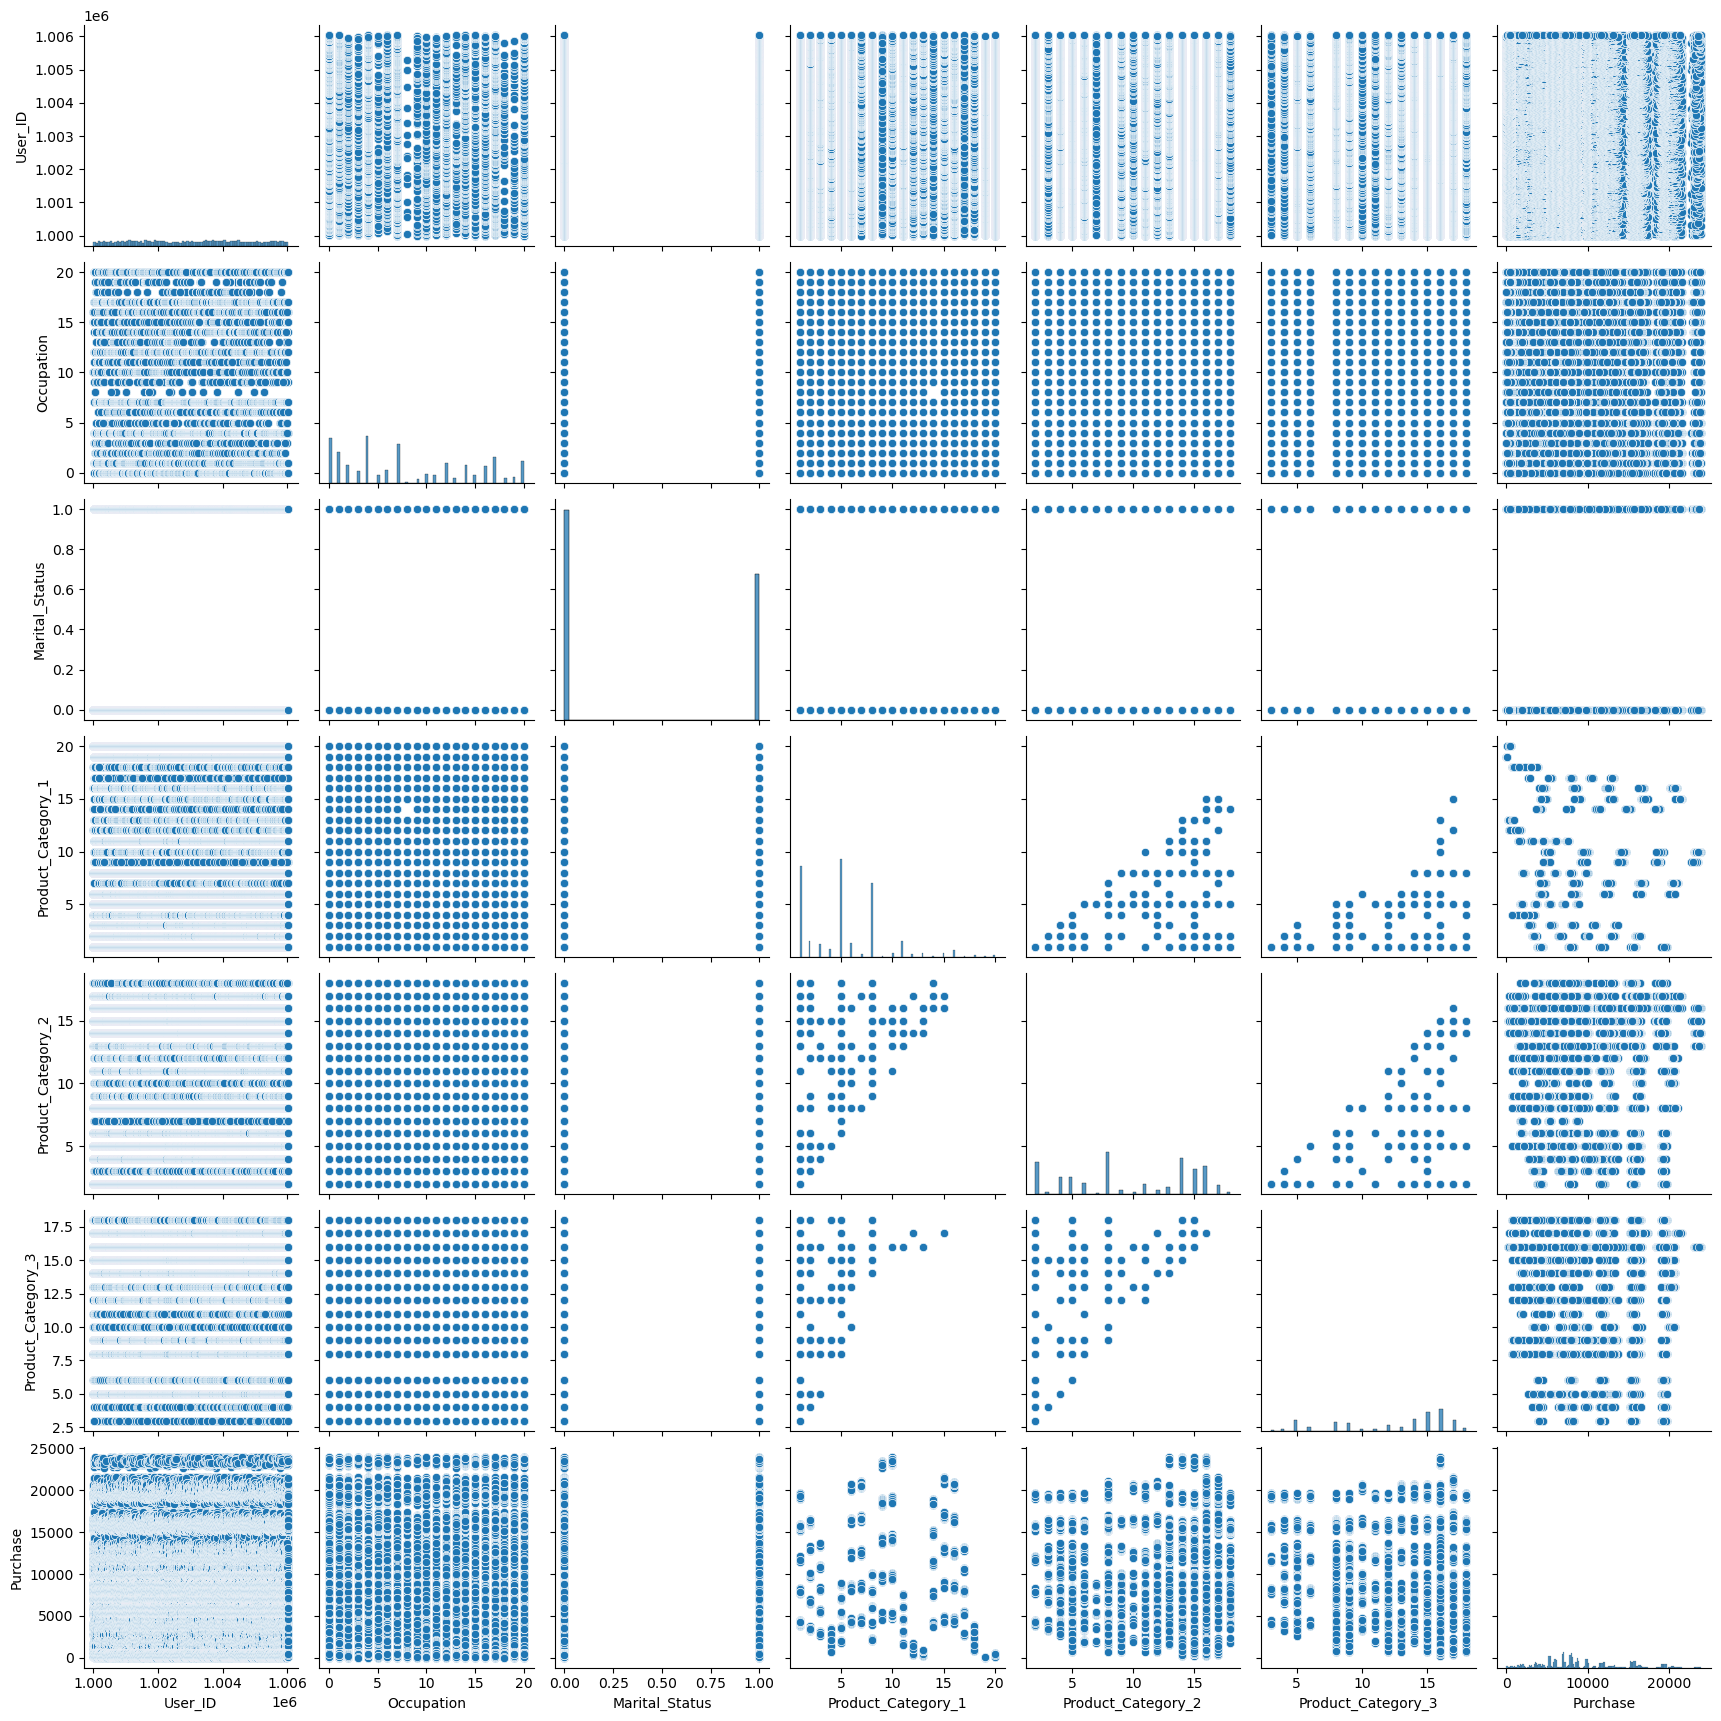

In [31]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

In [32]:
print(train.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


In [33]:
# Select only numeric columns
numeric_train = train.select_dtypes(include=['number'])

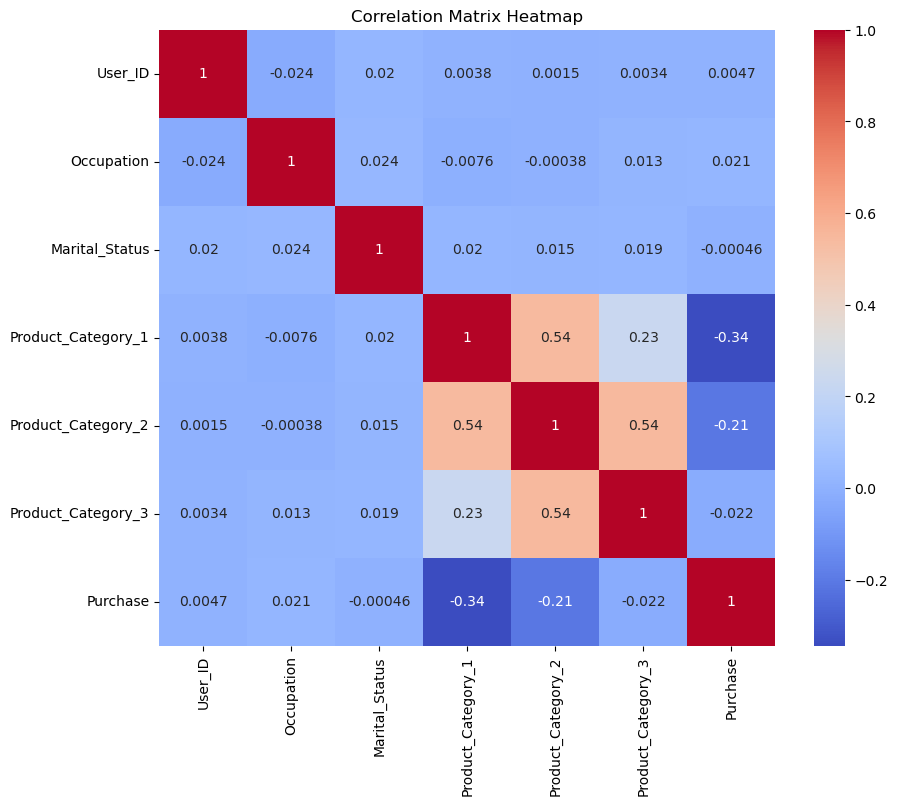

In [34]:
# Check if there are any numeric columns to compute the correlation
if not numeric_train.empty:
    plt.figure(figsize=(10, 8))  
    sns.heatmap(numeric_train.corr(), annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix Heatmap')
    plt.savefig('Correlation_matrix_heatmap.png')
    plt.show()
else:
    print("No numeric columns available for correlation analysis.")

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
An interesting observation can be made from the gender distribution plot that the number of females was less than the number of men who shopped during Black Friday.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.
</p></li>    

</ul>

</div>

## Step 3: Data preprocessing

### 3.1: Merging of train and test

In [38]:
train['source'] = 'train'
test['source'] = 'test'

In [39]:
dataset = pd.concat([train, test])

In [40]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


### 3.2: Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [42]:
dataset['Age'] = dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [43]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

### 3.3: Dropping irrelevant features

In [45]:
dataset.drop('User_ID', axis = 1, inplace = True)

In [46]:
dataset.drop('Product_ID', axis = 1, inplace = True)

### 3.4: Feature Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [50]:
label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [51]:
label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

In [52]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,0,0,10,0,2,0,3,NaN,NaN,8370.0,train
1,0,0,10,0,2,0,1,6.0,14.0,15200.0,train
2,0,0,10,0,2,0,12,NaN,NaN,1422.0,train
3,0,0,10,0,2,0,12,14.0,NaN,1057.0,train
4,1,6,16,2,4,0,8,NaN,NaN,7969.0,train


### 3.5: Fixing null values in 'Product_Category_2' and 'Product_Category_3'

In [54]:
#dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace = True)
dataset['Product_Category_3'] = dataset['Product_Category_3'].apply(lambda x : 0 if pd.isna(x) else x)
dataset['Product_Category_2'] = dataset['Product_Category_2'].apply(lambda x : 0 if pd.isna(x) else x)

In [55]:
type(dataset['Stay_In_Current_City_Years'][0])

pandas.core.series.Series

### 3.7: Separating dataset into train and test

In [57]:
train = dataset.loc[dataset['source'] == 'train']
test = dataset.loc[dataset['source'] == 'test']

In [58]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

### 3.8: Separating train into X and Y

In [60]:
X = train.drop("Purchase", axis = 1)

In [61]:
Y = train["Purchase"]

### 3.9: Feature Selection

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [64]:
selector.fit(X, Y)

ExtraTreesRegressor()

In [65]:
feature_imp = selector.feature_importances_

In [66]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.64
1 3.1
2 6.78
3 0.9
4 3.54
5 0.89
6 69.35
7 5.41
8 9.39


### 3.11: Creating a train test split

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [69]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (440054, 9)
X_test shape: (110014, 9)
Y_train shape: (440054,)
Y_test shape: (110014,)


# Step 4: Data Modelling

## 4.1 Supervised Learning

### 4.1.1: Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [74]:
model.fit(X_train, Y_train)

LinearRegression()

In [75]:
model.predict(X_test)

array([13261.49185762, 12371.88047689,  7212.52805281, ...,
        7600.31088995,  8993.73149695,  8607.98866682])

In [76]:
predictions = model.predict(X_test)

### 4.1.2: KNN Regression

In [78]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [79]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [80]:
Y_pred_knn = knn.predict(X_test)

### 4.1.3: Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [83]:
ran_for.fit(X_train, Y_train)

RandomForestRegressor()

In [84]:
Y_pred_ran_for = ran_for.predict(X_test)
Y_pred_ran_for

array([13300.94437179, 14270.66310292,  6975.26888853, ...,
        6878.66778205,  3534.05873377,  9583.62694021])

### 4.1.4: Decision Tree Regression

In [86]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [87]:
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [88]:
Y_pred_dec = dec_tree.predict(X_test)

## ** Model Evaluation **

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [91]:
print('Linear Regression : ')
print('Mean Absolute Error:',mean_absolute_error(Y_test, predictions))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, predictions)))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(Y_test, predictions)))
print('R2 Score : ', r2_score(Y_test, predictions))

Linear Regression : 
Mean Absolute Error: 3526.591096466979
RMSE: 4618.695144021098
Root Mean Squared Error: 4618.695144021098
R2 Score :  0.150991321396022


In [92]:
print('Random Forest Regression : ')
print('Mean Absolute Error:',mean_absolute_error(Y_test, Y_pred_ran_for))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print('R2 Score : ', r2_score(Y_test, Y_pred_ran_for))

Random Forest Regression : 
Mean Absolute Error: 2226.959844069445
RMSE: 3061.1672563189595
Root Mean Squared Error: 3061.1672563189595
R2 Score :  0.6270525407483145


In [93]:
print('Decision Tree Regression : ')
print('Mean Absolute Error:',mean_absolute_error(Y_test, Y_pred_dec))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print('R2 Score : ', r2_score(Y_test, Y_pred_dec))

Decision Tree Regression : 
Mean Absolute Error: 2370.2399539483413
RMSE: 3354.284209197909
Root Mean Squared Error: 3354.284209197909
R2 Score :  0.5522111765203577


In [94]:
print('KNN Regression : ')
print('Mean Absolute Error:',mean_absolute_error(Y_test, Y_pred_knn))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print('R2 Score : ', r2_score(Y_test, Y_pred_knn))

KNN Regression : 
Mean Absolute Error: 2362.6396676786594
RMSE: 3224.5278906308627
Root Mean Squared Error: 3224.5278906308627
R2 Score :  0.5861853994420017


## 4.2 Unsupervised Learning

In [100]:
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [102]:
dataset_clustering = dataset.select_dtypes(include=['int64', 'float64']).drop(columns=['Purchase'])

In [104]:
# Standardize the data
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset_clustering)


In [106]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=5)  
dataset_pca = pca.fit_transform(dataset_scaled)

### 4.2.1: MiniBatch KMeans Clustering

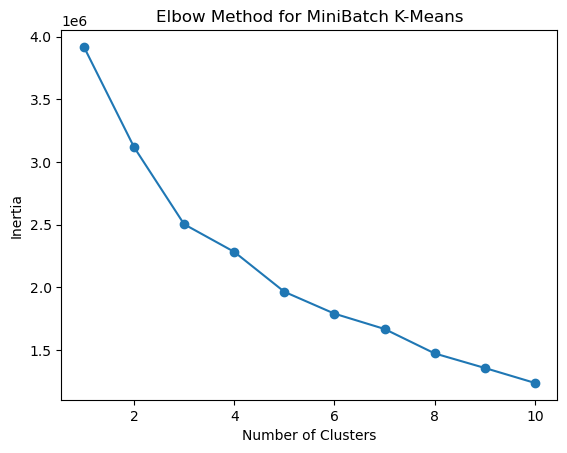

In [109]:
# K-Means (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    kmeans.fit(dataset_pca)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for MiniBatch K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.savefig('Elbow_method.png')
plt.show()


### 4.2.2: Hierarchical Clustering Dendrogram (PCA)

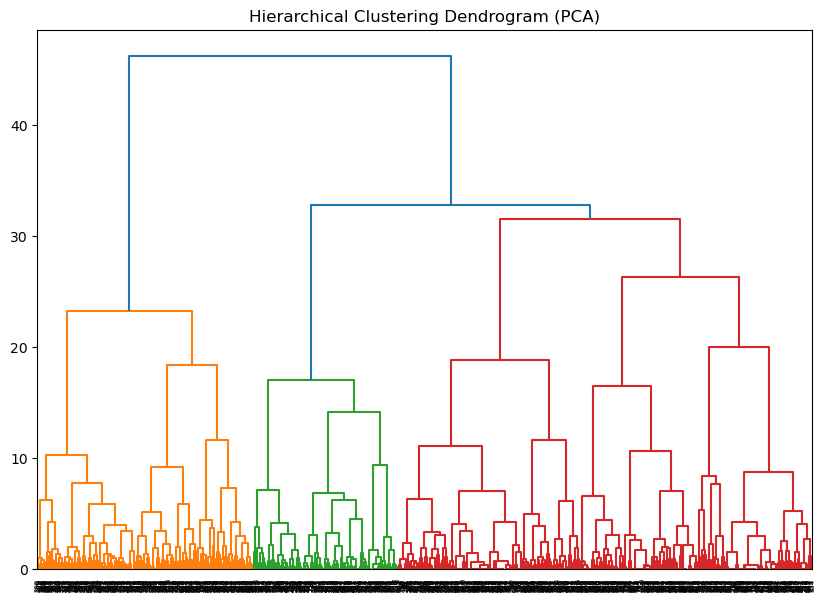

In [111]:
# Hierarchical Clustering on PCA data
linked = linkage(dataset_pca[:1000], method='ward')  

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram (PCA)")
plt.savefig('Hierarchical Clustering Dendrogram (PCA).png')
plt.show()


<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we tried to build a model using various algorithms such as Linear regression, KNN regression, Decision tree regression and Random forest to get the best possible prediction.
</p></li>     
 <li><p style="font-family:verdana;">
We also used unsupervised method of machine learning like MiniBatch KMeans Clustering to reveal distinct data segments and typical characteristics of each group and Dendogram to showcase the hierarchical relationships between data points, visualizing natural grouping levels and subgroup connections.
</p></li>          

</ul>

</div>

In [114]:
import sys
print("Python version:", sys.version)

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [116]:
import spyder
print("Spyder version:", spyder.__version__)

Spyder version: 5.5.1
